# Plot time series in csv files (RSAM, DSAR,...)

In [25]:
# import packages
import numpy as np
import pandas as pd
from obspy import UTCDateTime
import scipy.signal
import glob
import matplotlib.pyplot as plt

### All time Series as figure with subplots

In [2]:
# define functions
def norm(s):
    '''normalized each time serie'''
    diff_s = max(s)-min(s)
    s_norm = ((s - min(s))/diff_s)
    return s_norm

def mask_df(row):
    '''should find and mask peaks in each time serie'''
    peaks, properties = scipy.signal.find_peaks(row, prominence=(row.rolling('10D').median()*100).to_numpy(), distance=len(row))
    row_masked = row.copy()
    try:
#         row_masked[row_masked>min(row_masked.iloc[properties['left_bases'][0]:properties['right_bases'][0]])]=np.nan
        row_masked.iloc[properties['left_bases'][0]-500:properties['right_bases'][0]+500]=np.nan
    except:
        pass
    return row_masked

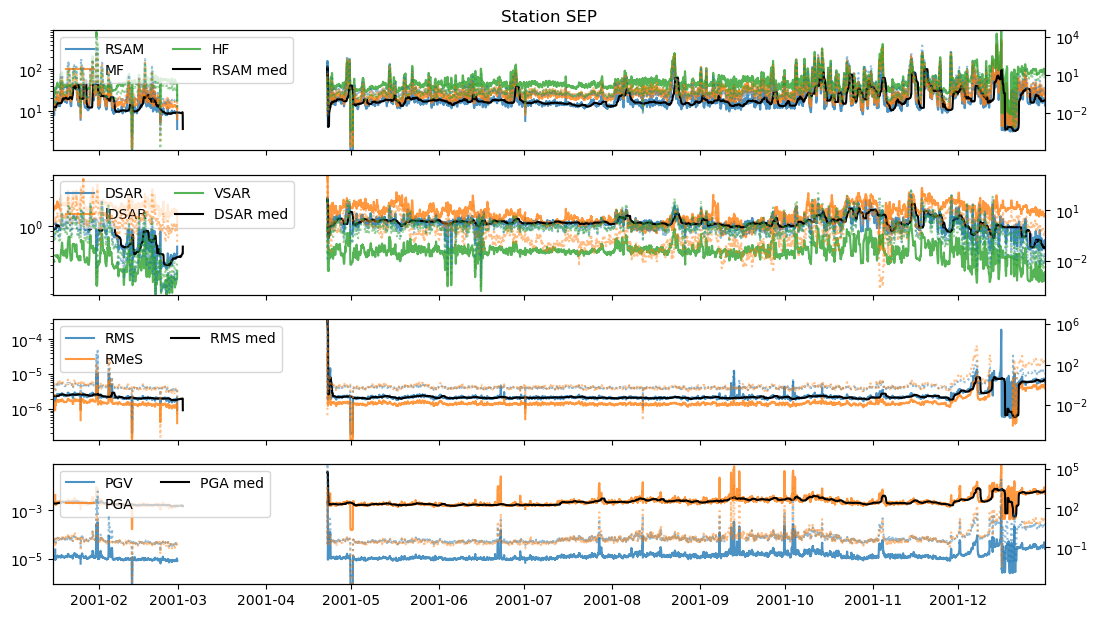

In [30]:
# LOG plot
year = 2001
sta_list = ['SEP']
# or for all avaivable stations
# all_files = sorted(glob.glob('../data/{}_*_extended2.csv'.format(year)))
# sta_list = np.unique([file.split('/')[2].split('_')[1] for file in all_files])
#============================================================================================
for sta in sta_list:
    df = pd.read_csv('../data/{}_{}_extended2.csv'.format(year,sta)) # read data from csv
#     df = pd.read_csv('../{}_extended2_long.csv'.format(sta))
    df.set_index('time',inplace=True) # set time as index
    df.index = pd.to_datetime(df.index).tz_localize(None) # convert time to datetime
    df = df.resample('10min').median() # resample to 10 min if data gaps
    
    df = df.apply(mask_df,axis=0) # remove outliers (the peak detection does not work well)
        
    df = df.rolling('6H', center=True).median() # roll over 6 hours and take median (whole df)
#     df = df.resample('1H').median() # resample over 1 hour and take median (whole df)
    # roll over 2 days and take median (column of interest)
    df['rsam_median'] = df['rsam'].rolling('2D').median() 
    df['zsc2_rsam_median'] = df['zsc2_rsam'].rolling('2D').median()
    df['dsar_median'] = df['dsar'].rolling('2D').median()
    df['zsc2_dsar_median'] = df['zsc2_dsar'].rolling('2D').median()
    df['rms_median'] = df['rms'].rolling('2D').median()
    df['zsc2_rms_median'] = df['zsc2_rms'].rolling('2D').median()
    df['pga_median'] = df['pga'].rolling('2D').median()
    df['zsc2_pga_median'] = df['zsc2_pga'].rolling('2D').median()

# start plotting ========================================================================================
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, figsize=(6.4*2, 4.8*1.5))
    
    # first subplot left side ---------------------------------------------------------------------------
    ax1.plot(df['rsam'], label='RSAM', alpha=0.8)
    ax1.plot(df['mf'], label='MF', alpha=0.8)
    ax1.plot(df['hf'], label='HF', alpha=0.8)
    ax1.plot(df['rsam_median'], label='RSAM med',color='k')
    ax1.set_ylim(min(df['rsam'].min(),df['mf'].min(),df['hf'].min()),max(df['rsam'].max(),df['mf'].max(),df['hf'].max()))

    # first subplot right side ---------------------------------------------------------------------------
    ax11 = ax1.twinx()
    ax11.plot(df['zsc2_rsam'],linestyle=':', alpha=0.5)
    ax11.plot(df['zsc2_mf'], linestyle=':', alpha=0.5)
    ax11.plot(df['zsc2_hf'], linestyle=':', alpha=0.5)
    ax11.set_ylim(min(df['zsc2_rsam'].min(),df['zsc2_mf'].min(),df['zsc2_hf'].min()),max(df['zsc2_rsam'].max(),df['zsc2_mf'].max(),df['zsc2_hf'].max()))

    # second subplot left side ---------------------------------------------------------------------------
    ax2.plot(df['dsar'], label='DSAR', alpha=0.8)
    ax2.plot(df['ldsar'], label='lDSAR', alpha=0.8)
    ax2.plot(df['vsar'], label='VSAR', alpha=0.8)
    ax2.plot(df['dsar_median'], label='DSAR med',color='k')
    ax2.set_ylim(min(df['dsar'].min(),df['ldsar'].min(),df['vsar'].min()),max(df['dsar'].max(),df['ldsar'].max(),df['vsar'].max()))

    # second subplot right side ---------------------------------------------------------------------------
    ax22 = ax2.twinx()
    ax22.plot(df['zsc2_dsar'],linestyle=':', alpha=0.5)
    ax22.plot(df['zsc2_ldsar'], linestyle=':', alpha=0.5)
    ax22.plot(df['zsc2_vsar'], linestyle=':', alpha=0.5)
    ax22.set_ylim(min(df['zsc2_dsar'].min(),df['zsc2_ldsar'].min(),df['zsc2_vsar'].min()),
                  max(df['zsc2_dsar'].max(),df['zsc2_ldsar'].max(),df['zsc2_vsar'].max()))
#     ax2.plot(df['zsc2_dsar'], label='zscDSAR', color='C4', alpha=0.5)
#     ax2.plot(df['zsc2_dsar_median'], label='median zscDSAR', color='k')

    # third subplot left side ---------------------------------------------------------------------------
    ax3.plot(df['rms'], label='RMS', alpha=0.8)
    ax3.plot(df['rmes'], label='RMeS', alpha=0.8)
    ax3.plot(df['rms_median'], label='RMS med',color='k')
#     ax3.plot(df['pgv'], label='PGV', alpha=0.8)
#     ax3.plot(df['pga'], label='PGA', alpha=0.8)
#     ax3.set_ylim(0,max(df['rms'].max(),df['rmes'].max(),df['pgv'].max(),df['pga'].max())) # linear
    ax3.set_ylim(min(df['rms'].min(),df['rmes'].min()),max(df['rms'].max(),df['rmes'].max()))

    # third subplot right side ---------------------------------------------------------------------------
    ax33 = ax3.twinx()
    ax33.plot(df['zsc2_rms'],linestyle=':', alpha=0.5)
    ax33.plot(df['zsc2_rmes'], linestyle=':', alpha=0.5)
#     ax33.plot(df['zsc2_pgv'], linestyle=':', alpha=0.5)
#     ax33.plot(df['zsc2_pga'], linestyle=':', alpha=0.5)
#     ax33.set_ylim(0,max(df['zsc2_rms'].max(),df['zsc2_rmes'].max(),df['zsc2_pgv'].max(),df['zsc2_pga'].max())) # linear
    ax33.set_ylim(min(df['zsc2_rms'].min(),df['zsc2_rmes'].min()),max(df['zsc2_rms'].max(),df['zsc2_rmes'].max()))      

    # fourth subplot left side ---------------------------------------------------------------------------
    ax4.plot(df['pgv'], label='PGV', alpha=0.8)
    ax4.plot(df['pga'], label='PGA', alpha=0.8)
    ax4.plot(df['pga_median'], label='PGA med',color='k')
    ax4.set_ylim(min(df['pgv'].min(),df['pga'].min()),max(df['pgv'].max(),df['pga'].max())) # linear

    # fourth subplot right side ---------------------------------------------------------------------------
    ax44 = ax4.twinx()
    ax44.plot(df['zsc2_pgv'], linestyle=':', alpha=0.5)
    ax44.plot(df['zsc2_pga'], linestyle=':', alpha=0.5)
    ax44.set_ylim(min(df['zsc2_pgv'].min(),df['zsc2_pga'].min()),max(df['zsc2_pgv'].max(),df['zsc2_pga'].max()))
    
    # vertical line fror eruption date ----------------------------------------------------------------
    ax1.vlines(UTCDateTime('2004-09-23T09:00:00'),ax1.get_ylim()[0],ax1.get_ylim()[-1], 'k','--')
    ax2.vlines(UTCDateTime('2004-09-23T09:00:00'),ax2.get_ylim()[0],ax2.get_ylim()[-1], 'k','--')
    ax3.vlines(UTCDateTime('2004-09-23T09:00:00'),ax3.get_ylim()[0],ax3.get_ylim()[-1], 'k','--')
    ax4.vlines(UTCDateTime('2004-09-23T09:00:00'),ax4.get_ylim()[0],ax4.get_ylim()[-1], 'k','--')
    
    ax1.vlines(UTCDateTime('2004-10-01T19:00:00'),ax1.get_ylim()[0],ax1.get_ylim()[-1], 'k','--')
    ax2.vlines(UTCDateTime('2004-10-01T19:00:00'),ax2.get_ylim()[0],ax2.get_ylim()[-1], 'k','--')
    ax3.vlines(UTCDateTime('2004-10-01T19:00:00'),ax3.get_ylim()[0],ax3.get_ylim()[-1], 'k','--')
    ax4.vlines(UTCDateTime('2004-10-01T19:00:00'),ax4.get_ylim()[0],ax4.get_ylim()[-1], 'k','--')

    # legend  ---------------------------------------------------------------------------
    ax1.legend(ncol=2, loc='upper left')
    ax2.legend(ncol=2, loc='upper left')
    ax3.legend(ncol=2, loc='upper left')
    ax4.legend(ncol=2, loc='upper left')
    
    # axis & title--------------------------------------------------------------------------------------
    ax1.set_xlim(df.index[0], df.index[-1])
    ax1.set_yscale('log');ax11.set_yscale('log')
    ax2.set_yscale('log');ax22.set_yscale('log')
    ax3.set_yscale('log');ax33.set_yscale('log')
    ax4.set_yscale('log');ax44.set_yscale('log')
    
    ax1.set_title('Station {}'.format(sta))
    
    # save ---------------------------------------------------------------------------
#     file_path = '../plots/{}/'.format(year)
#     if not os.path.exists(file_path): # create path if not exist
#         os.makedirs(file_path)
#     plt.savefig('../plots/{}/{}_{}.png'.format(year,year,sta), dpi=300, bbox_inches='tight')
    fig.show()

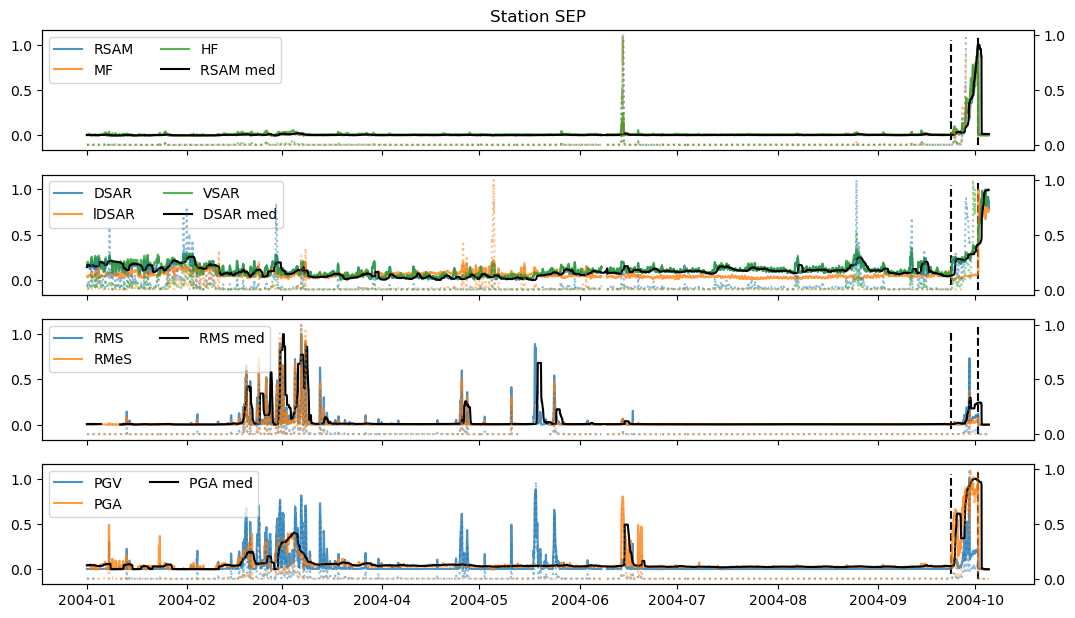

In [32]:
# NORMALIZED plot
year = 2004
sta_list = ['SEP']
# or for all avaivable stations
# all_files = sorted(glob.glob('../data/{}_*_extended2.csv'.format(year)))
# sta_list = np.unique([file.split('/')[2].split('_')[1] for file in all_files])
#============================================================================================
for sta in sta_list:
    df = pd.read_csv('../data/{}_{}_extended2.csv'.format(year,sta)) # read data from csv
#     df = pd.read_csv('../{}_extended2_long.csv'.format(sta))
    df.set_index('time',inplace=True) # set time as index
    df.index = pd.to_datetime(df.index).tz_localize(None) # convert time to datetime
    df = df.resample('10min').median() # resample to 10 min if data gaps
    
    df = df.apply(mask_df,axis=0) # remove outliers (the peak detection does not work well)
        
    df = df.rolling('6H', center=True).median() # roll over 6 hours and take median (whole df)
#     df = df.resample('1H').median() # resample over 1 hour and take median (whole df)
    # roll over 2 days and take median (column of interest)
    df['rsam_median'] = df['rsam'].rolling('2D').median() 
    df['zsc2_rsam_median'] = df['zsc2_rsam'].rolling('2D').median()
    df['dsar_median'] = df['dsar'].rolling('2D').median()
    df['zsc2_dsar_median'] = df['zsc2_dsar'].rolling('2D').median()
    df['rms_median'] = df['rms'].rolling('2D').median()
    df['zsc2_rms_median'] = df['zsc2_rms'].rolling('2D').median()
    df['pga_median'] = df['pga'].rolling('2D').median()
    df['zsc2_pga_median'] = df['zsc2_pga'].rolling('2D').median()

    df = df.apply(norm,axis=0) # normalize all timesiries individual
    
# start plotting ========================================================================================
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, figsize=(6.4*2, 4.8*1.5))
    
    # first subplot left side ---------------------------------------------------------------------------
    ax1.plot(df['rsam'], label='RSAM', alpha=0.8)
    ax1.plot(df['mf'], label='MF', alpha=0.8)
    ax1.plot(df['hf'], label='HF', alpha=0.8)
    ax1.plot(df['rsam_median'], label='RSAM med',color='k')

    # first subplot right side ---------------------------------------------------------------------------
    ax11 = ax1.twinx()
    ax11.plot(df['zsc2_rsam'],linestyle=':', alpha=0.5)
    ax11.plot(df['zsc2_mf'], linestyle=':', alpha=0.5)
    ax11.plot(df['zsc2_hf'], linestyle=':', alpha=0.5)

    # second subplot left side ---------------------------------------------------------------------------
    ax2.plot(df['dsar'], label='DSAR', alpha=0.8)
    ax2.plot(df['ldsar'], label='lDSAR', alpha=0.8)
    ax2.plot(df['vsar'], label='VSAR', alpha=0.8)
    ax2.plot(df['dsar_median'], label='DSAR med',color='k')

    # second subplot right side ---------------------------------------------------------------------------
    ax22 = ax2.twinx()
    ax22.plot(df['zsc2_dsar'],linestyle=':', alpha=0.5)
    ax22.plot(df['zsc2_ldsar'], linestyle=':', alpha=0.5)
    ax22.plot(df['zsc2_vsar'], linestyle=':', alpha=0.5)
#     ax2.plot(df['zsc2_dsar'], label='zscDSAR', color='C4', alpha=0.5)
#     ax2.plot(df['zsc2_dsar_median'], label='median zscDSAR', color='k')

    # third subplot left side ---------------------------------------------------------------------------
    ax3.plot(df['rms'], label='RMS', alpha=0.8)
    ax3.plot(df['rmes'], label='RMeS', alpha=0.8)
    ax3.plot(df['rms_median'], label='RMS med',color='k')
#     ax3.plot(df['pgv'], label='PGV', alpha=0.8)
#     ax3.plot(df['pga'], label='PGA', alpha=0.8)

    # third subplot right side ---------------------------------------------------------------------------
    ax33 = ax3.twinx()
    ax33.plot(df['zsc2_rms'],linestyle=':', alpha=0.5)
    ax33.plot(df['zsc2_rmes'], linestyle=':', alpha=0.5)
#     ax33.plot(df['zsc2_pgv'], linestyle=':', alpha=0.5)
#     ax33.plot(df['zsc2_pga'], linestyle=':', alpha=0.5)

    # fourth subplot left side ---------------------------------------------------------------------------
    ax4.plot(df['pgv'], label='PGV', alpha=0.8)
    ax4.plot(df['pga'], label='PGA', alpha=0.8)
    ax4.plot(df['pga_median'], label='PGA med',color='k')

    # fourth subplot right side ---------------------------------------------------------------------------
    ax44 = ax4.twinx()
    ax44.plot(df['zsc2_pgv'], linestyle=':', alpha=0.5)
    ax44.plot(df['zsc2_pga'], linestyle=':', alpha=0.5)
    
    # vertical line fror eruption date ----------------------------------------------------------------
    ax1.vlines(UTCDateTime('2004-09-23T09:00:00'),ax1.get_ylim()[0],ax1.get_ylim()[-1], 'k','--')
    ax2.vlines(UTCDateTime('2004-09-23T09:00:00'),ax2.get_ylim()[0],ax2.get_ylim()[-1], 'k','--')
    ax3.vlines(UTCDateTime('2004-09-23T09:00:00'),ax3.get_ylim()[0],ax3.get_ylim()[-1], 'k','--')
    ax4.vlines(UTCDateTime('2004-09-23T09:00:00'),ax4.get_ylim()[0],ax4.get_ylim()[-1], 'k','--')
    
    ax1.vlines(UTCDateTime('2004-10-01T19:00:00'),ax1.get_ylim()[0],ax1.get_ylim()[-1], 'k','--')
    ax2.vlines(UTCDateTime('2004-10-01T19:00:00'),ax2.get_ylim()[0],ax2.get_ylim()[-1], 'k','--')
    ax3.vlines(UTCDateTime('2004-10-01T19:00:00'),ax3.get_ylim()[0],ax3.get_ylim()[-1], 'k','--')
    ax4.vlines(UTCDateTime('2004-10-01T19:00:00'),ax4.get_ylim()[0],ax4.get_ylim()[-1], 'k','--')

    # legend  ---------------------------------------------------------------------------
    ax1.legend(ncol=2, loc='upper left')
    ax2.legend(ncol=2, loc='upper left')
    ax3.legend(ncol=2, loc='upper left')
    ax4.legend(ncol=2, loc='upper left')
    
    ax1.set_title('Station {}'.format(sta))
    
#     file_path = '../plots/{}/'.format(year)
#     if not os.path.exists(file_path): # create path if not exist
#         os.makedirs(file_path)
#     plt.savefig('../plots/{}/{}_{}_norm.png'.format(year,year,sta), dpi=300, bbox_inches='tight')

    fig.show()

### Plot all statations but only the median (blak line above)

<AxesSubplot:xlabel='time'>

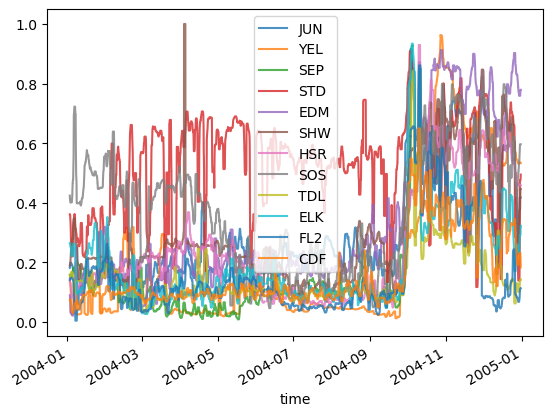

In [8]:
df_dsar_median.plot(alpha=0.8)

<AxesSubplot:xlabel='time'>

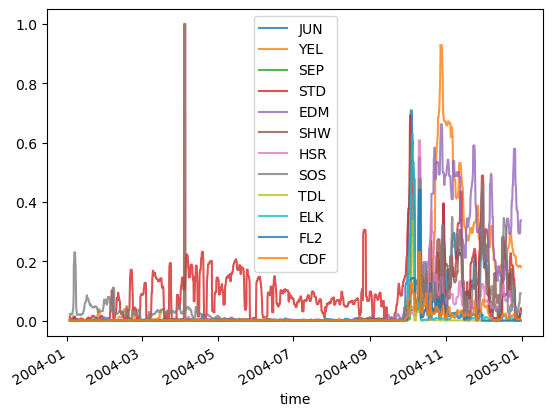

In [9]:
df_zscdsar_median.plot(alpha=0.8)

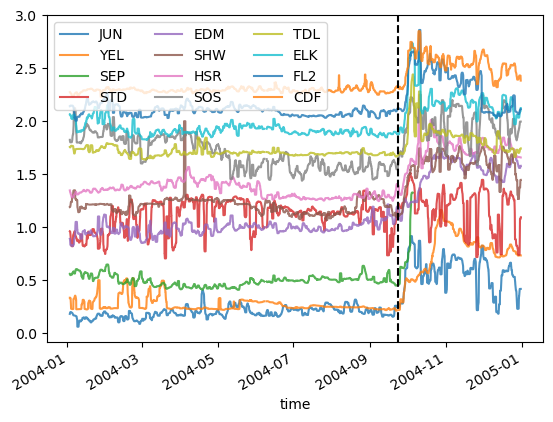

In [10]:
df_dsar_median_copy = df_dsar_median.copy()
for i in range(df_dsar_median_copy.shape[1]):
    df_dsar_median_copy.iloc[:, i] = df_dsar_median_copy.iloc[:, i]+(i*0.2)
df_dsar_median_copy.plot(alpha=0.8)
plt.axvline(UTCDateTime('2004-09-23T09:00:00'), color='k',linestyle='--')
plt.legend(ncol=3, loc='upper left')
plt.savefig('../plots/DSARmed_norm.png', dpi=300, bbox_inches='tight')

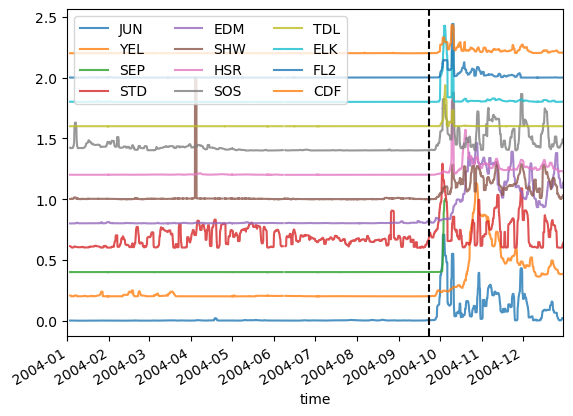

In [11]:
df_zscdsar_median_copy = df_zscdsar_median.copy()
for i in range(df_zscdsar_median_copy.shape[1]):
    df_zscdsar_median_copy.iloc[:, i] = df_zscdsar_median_copy.iloc[:, i]+(i*0.2)
df_zscdsar_median_copy.plot(alpha=0.8)
plt.xlim(df_zscdsar_median_copy.index[0],df_zscdsar_median_copy.index[-1])
plt.axvline(UTCDateTime('2004-09-23T09:00:00'), color='k',linestyle='--')
plt.legend(ncol=3, loc='upper left')
plt.savefig('../plots/zscDSARm_norm.png', dpi=300, bbox_inches='tight')

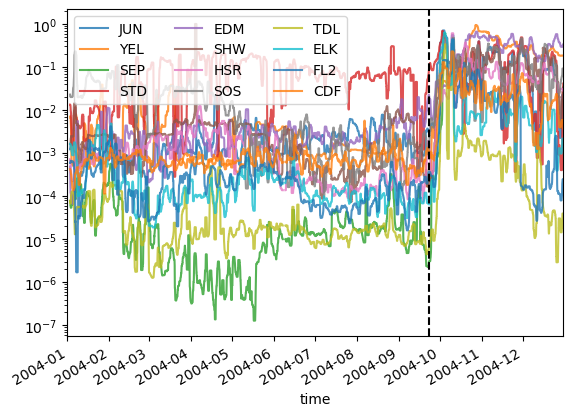

In [12]:
df_zscdsar_median_copy = df_zscdsar_median.copy()
for i in range(df_zscdsar_median_copy.shape[1]):
    df_zscdsar_median_copy.iloc[:, i] = df_zscdsar_median_copy.iloc[:, i]
df_zscdsar_median_copy.plot(alpha=0.8)
plt.xlim(df_zscdsar_median_copy.index[0],df_zscdsar_median_copy.index[-1])
plt.yscale('log')
plt.axvline(UTCDateTime('2004-09-23T09:00:00'), color='k',linestyle='--')
plt.legend(ncol=3, loc='upper left')
plt.savefig('../plots/zscDSARm_norm_log.png', dpi=300, bbox_inches='tight')

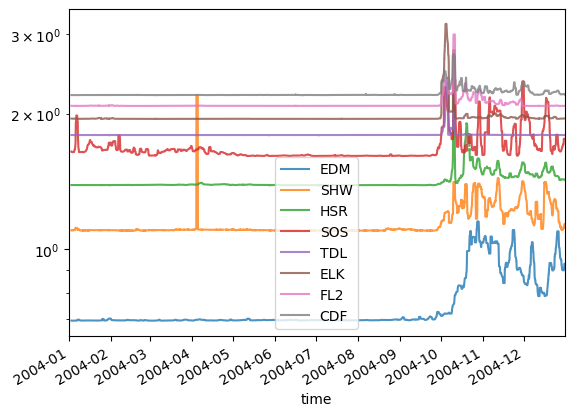

In [108]:
df_zscdsar_median_copy = df_zscdsar_median.copy()
for i in range(df_zscdsar_median_copy.shape[1]):
    df_zscdsar_median_copy.iloc[:, i] = df_zscdsar_median_copy.iloc[:, i]*np.log((i+2))+np.log((i+2))
df_zscdsar_median_copy.plot(alpha=0.8)
plt.xlim(df_zscdsar_median_copy.index[0],df_zscdsar_median_copy.index[-1])
plt.yscale('log')